# SIMULACIÓN DE MONTECARLO

## Teoría de los grandes números

Repliquemos el experimento de lanzar $n$ veces un dado para observar cómo la probabilidad experimental se acerca cada vez más a la teórica a medida que repetimos muchas veces el experimento.


## Generación de datos

Generar $n$ lanzamientos aleatorios garantizando la reproducibilidad de los resultados, para ello se establece una semilla para el generador de números aleatorios.


In [85]:
set.seed(2026)

N_ROLLS <- 100
rolls <- sample(c(1:6), N_ROLLS, replace = TRUE)
rolls


[1] 5 1 1 6 5 3 4 4 5 4 2 2 3 5 6 1 4 2 6 2 6 2 5 5 4 5 3 4 3 3 2 5 4 2 2 5 4
 [38] 5 5 1 4 5 1 5 2 1 3 2 6 5 5 3 5 4 1 1 3 5 5 1 4 1 6 4 1 1 4 6 5 4 5 3 6 6
 [75] 1 4 3 1 1 4 6 5 1 3 4 1 5 5 4 5 5 1 2 4 3 6 5 3 5 1

## Conteo de frecuencias

Se calcula cuántas veces aparece cada cara para obtener las frecuencias observadas.


In [86]:
counts <- table(rolls)
counts


rolls
 1  2  3  4  5  6 
19 11 13 19 27 11 

## Probabilidad experimental por cara

Se estima la probabilidad experimental de cada cara dividiendo el conteo entre el total de lanzamientos.


In [87]:
experimental_p <- counts / N_ROLLS
experimental_p


rolls
   1    2    3    4    5    6 
0.19 0.11 0.13 0.19 0.27 0.11 

## Convergencia de la probabilidad

Para visualizar la convergencia (ley de los grandes números), se puede seguir la probabilidad experimental acumulada de una sola cara y compararla con la probabilidad teórica $1/6$.


Probabilidad teórica = 0.1666667
Probabilidad experimental final = 0.19
Error = 0.02333333


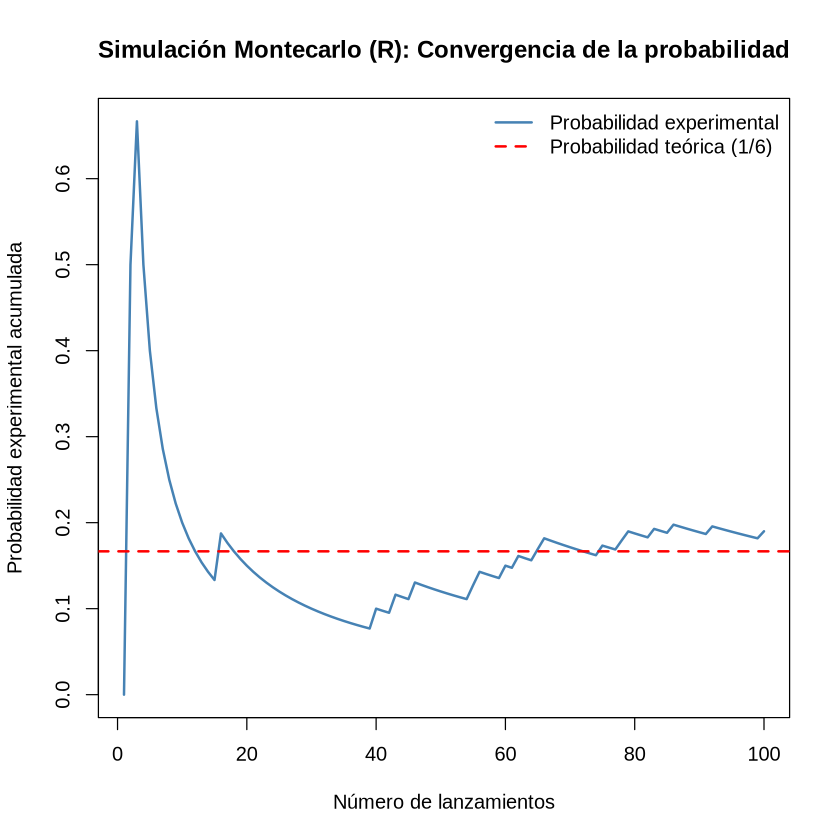

In [ ]:
THEORETICAL_P <- 1 / 6
FACE <- 1
experimental_p_trace <- cumsum(rolls == FACE) / seq_along(rolls)

par(bg = "white")
plot(
  x = seq_along(experimental_p_trace),
  y = experimental_p_trace,
  type = "l",
  lwd = 2,
  col = "steelblue",
  xlab = "Número de lanzamientos",
  ylab = "Probabilidad experimental acumulada",
  main = "Simulación Montecarlo (R): Convergencia de la probabilidad"
)
abline(h = THEORETICAL_P, col = "red", lty = 2, lwd = 2)
legend(
  "topright",
  legend = c("Probabilidad experimental", "Probabilidad teórica (1/6)"),
  col = c("steelblue", "red"),
  lty = c(1, 2),
  lwd = c(2, 2),
  bty = "n"
)

cat("Probabilidad teórica = ", THEORETICAL_P, "\n", sep = "")
cat("Probabilidad experimental final = ", experimental_p_trace[length(experimental_p_trace)], "\n", sep = "")
cat("Error = ", abs(experimental_p_trace[length(experimental_p_trace)] - THEORETICAL_P), "\n", sep = "")
